In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('FA-KES-Dataset.csv', encoding = 'latin1')
df_1.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [3]:
df_1.shape

(804, 7)

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [5]:
df_1['labels'] = df_1['labels'].replace({0 : 'fake', 1 : 'real'})

In [6]:
df_1['labels'].value_counts()

real    426
fake    378
Name: labels, dtype: int64

In [7]:
df_1.groupby(['source', 'labels']).size()

source         labels
ahram          fake      75
               real      74
alalam         fake      41
               real      49
alaraby        fake      36
               real      48
arabiya        fake      12
               real      10
asharqalawsat  fake       4
               real       7
dailysabah     fake      34
               real      40
etilaf         fake      26
               real      20
jordantimes    fake       8
               real      20
manar          fake      51
               real      54
nna            fake      10
               real       3
reuters        fake      14
               real      12
sana           fake      29
               real      27
sputnik        fake      16
               real      37
tass           fake       3
               real       2
trt            fake      19
               real      23
dtype: int64

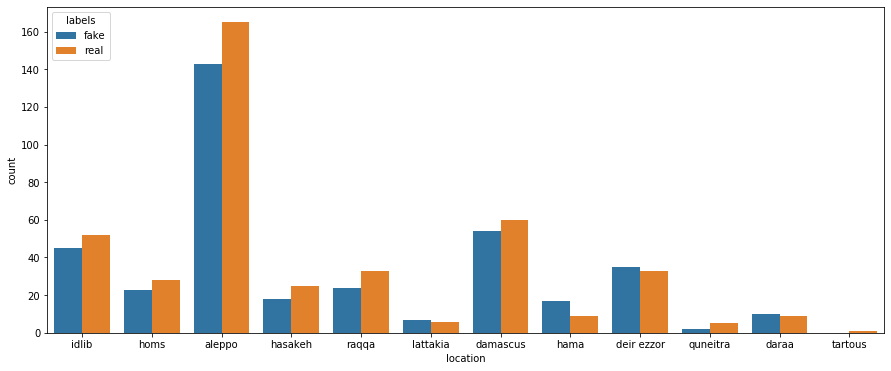

In [8]:
plt.figure(figsize = (15, 6))
sns.countplot('location', hue = 'labels', data = df_1)

In the first dataset, machine learning algorithm can use 'article_content' feature to detect fake news first by converting the text to lowercase and removing punctuation. Then it can get the most frequent words counts in real and fake news.

In [9]:
df_2 = pd.read_csv('news_articles.csv')
df_2.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [10]:
df_2.shape

(2096, 12)

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [12]:
df_2['hasImage'] = df_2['hasImage'].replace({0.0 : 'No', 1.0 : 'Yes'})

In [13]:
df_2['label'].value_counts()

Fake    1294
Real     801
Name: label, dtype: int64

In [14]:
df_2.groupby(['language', 'label']).size()

language  label
english   Fake     1220
          Real      797
french    Fake        1
          Real        1
german    Fake       72
ignore    Real        3
spanish   Fake        1
dtype: int64

In [15]:
df_2.groupby(['hasImage', 'label']).size()

hasImage  label
No        Fake     341
          Real     126
Yes       Fake     953
          Real     675
dtype: int64

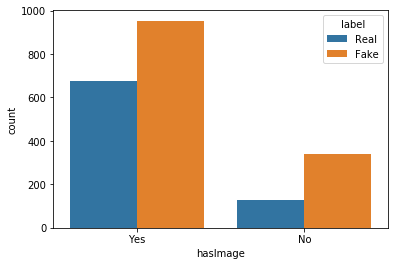

In [16]:
sns.countplot('hasImage', hue = 'label', data = df_2)

In the second dataset, machine learning algorithm can use 'text_without_stopwords' feature. 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [18]:
df_2.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [19]:
df_2 = df_2.dropna(axis = 0)

In [20]:
df_2.shape

(2045, 12)

In [21]:
X = df_2['text_without_stopwords'].copy()
y = df_2['label'].copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

In [23]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
print("Accuracy: {}%".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.7109375%


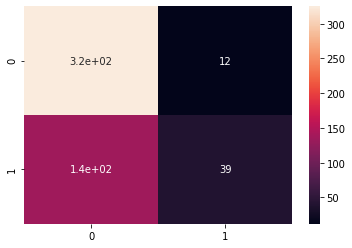

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)